In [2]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import re

import nltk
nltk.download('punkt')

from nltk import ngrams
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.shape

(7613, 5)

In [5]:
df.drop('id',axis=1,inplace=True)

In [6]:
df.duplicated().sum()

52

In [7]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(7561, 4)

In [10]:
def clean_words(text):
    text = re.sub(r'(http.*)|#', '', text)
    tokens = word_tokenize(text)
    stops = stopwords.words('english')
    clean_tokens = [token.lower() for token in tokens if token.lower() not in stops and token.isalnum()]
    return ' '.join(clean_tokens)

In [11]:
nltk.download('punkt_tab')
df['text'] = df['text'].map(clean_words)
df.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,keyword,location,text,target
0,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,NaN,NaN,forest fire near la ronge sask canada,1
2,NaN,NaN,residents asked place notified officers evacua...,1
3,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [12]:
df.isnull().sum()/len(df)*100

keyword      0.806772
location    33.064409
text         0.000000
target       0.000000
dtype: float64

In [13]:
df['keyword'].value_counts().sum()

7500

In [14]:
#lemmatizing using spacy
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy

nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):

    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])

    return lemmatized_text

df['text'] = df['text'].apply(lemmatize_text)
df.head()

Defaulting to user installation because normal site-packages is not writeable

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.



  Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl (15.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 10.1 MB/s eta 0:00:02
     ------------- -------------------------- 4.5/12.8 MB 13.4 MB/s eta 0:00:01
     ------------------------ --------------- 7.9/12.8 MB 14.7 MB/s eta 0:00:01
     ------------------------------- ------- 10.5/12.8 MB 13.9 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 12.7 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 11.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_

,keyword,location,text,target
0,NaN,NaN,deed reason earthquake may allah forgive we,1
1,NaN,NaN,forest fire near la ronge sask canada,1
2,NaN,NaN,resident ask place notify officer evacuation s...,1
3,NaN,NaN,people receive wildfire evacuation order calif...,1
4,NaN,NaN,get send photo ruby alaska smoke wildfire pour...,1


In [15]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Predefined list of disaster-related keywords
disaster_keywords = {"earthquake", "fire", "flood", "hurricane", "storm", "evacuation",
                     "tornado", "tsunami", "disaster", "wildfire", "explosion", "drought",
                     "landslide", "eruption", "pandemic", "emergency", "crisis", "sismo", "typhoon"}

# Function to extract disaster-related keyword and proper nouns from text
def extract_keywords(text):
    # Handle NaN values in 'text' by converting to string
    if not isinstance(text, str):
        text = str(text)

    # Tokenize the text and apply POS tagging
    words = word_tokenize(text.lower())  # Convert to lowercase for case-insensitive matching
    tagged_words = pos_tag(words)  # POS tagging

    # Extract disaster-related keywords
    disaster_matches = [word for word in words if word in disaster_keywords]

    # Extract proper nouns (NNP and NNPS)
    proper_nouns = [word for word, tag in tagged_words if tag in ['NNP', 'NNPS']]

    # Combine disaster-related keywords and proper nouns
    if disaster_matches:
        return ' '.join(disaster_matches)  # Return disaster-related keyword if found
    elif proper_nouns:
        return ' '.join(proper_nouns)  # Return proper nouns if no disaster keywords are found
    return None  # Return None if no keyword found

# Apply the keyword extraction only on rows where 'keyword' is NaN
df['keyword'] = df.apply(
    lambda row: extract_keywords(row['text']) if pd.isna(row['keyword']) else row['keyword'], axis=1
)

df.head()


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,keyword,location,text,target
0,earthquake,NaN,deed reason earthquake may allah forgive we,1
1,fire,NaN,forest fire near la ronge sask canada,1
2,evacuation,NaN,resident ask place notify officer evacuation s...,1
3,wildfire evacuation,NaN,people receive wildfire evacuation order calif...,1
4,wildfire,NaN,get send photo ruby alaska smoke wildfire pour...,1


In [16]:
df.isnull().sum()

keyword       36
location    2500
text           0
target         0
dtype: int64

In [17]:
df.duplicated().sum()

253

In [18]:
# Check for duplicates based on specific columns
duplicate_rows = df[df.duplicated(subset=['text', 'keyword'])]


In [19]:
df = df.drop_duplicates()
df.duplicated().sum()


0

In [20]:
df.shape

(7308, 4)

In [21]:
df.head()

,keyword,location,text,target
0,earthquake,NaN,deed reason earthquake may allah forgive we,1
1,fire,NaN,forest fire near la ronge sask canada,1
2,evacuation,NaN,resident ask place notify officer evacuation s...,1
3,wildfire evacuation,NaN,people receive wildfire evacuation order calif...,1
4,wildfire,NaN,get send photo ruby alaska smoke wildfire pour...,1


In [22]:
nan_keyword_rows = df[df['keyword'].isna()]

# Display the filtered rows
print(nan_keyword_rows)

     keyword location                                               text  \
10      None      NaN                     three people die heat wave far   
14      None      NaN      damage school bus 80 multi car crash breaking   
15      None      NaN                                                man   
16      None      NaN                                         love fruit   
17      None      NaN                                      summer lovely   
18      None      NaN                                           car fast   
19      None      NaN                                    goooooooaaaaaal   
20      None      NaN                                         ridiculous   
21      None      NaN                                        london cool   
22      None      NaN                                        love skiing   
23      None      NaN                                      wonderful day   
24      None      NaN                                           looooool   
25      None

In [23]:
df['keyword'] = df['keyword'].fillna('unknown')

In [24]:
df.isnull().sum()

keyword        0
location    2345
text           0
target         0
dtype: int64

In [25]:
df.drop('location',axis=1,inplace=True)

In [26]:
df.head()

,keyword,text,target
0,earthquake,deed reason earthquake may allah forgive we,1
1,fire,forest fire near la ronge sask canada,1
2,evacuation,resident ask place notify officer evacuation s...,1
3,wildfire evacuation,people receive wildfire evacuation order calif...,1
4,wildfire,get send photo ruby alaska smoke wildfire pour...,1


In [27]:
# 1:real disaster
# 0:not real disaster

In [28]:
df.isnull().sum()

keyword    0
text       0
target     0
dtype: int64

In [29]:
#No null values found in dataframe

In [30]:
df['target'].value_counts()

target
0    4228
1    3080
Name: count, dtype: int64

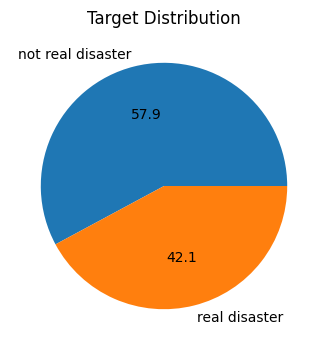

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.pie(df['target'].value_counts(), labels=['not real disaster','real disaster'], autopct='%0.1f')
plt.title('Target Distribution')
plt.show()

In [33]:
#Keyword analysis
#Unique Keywords
df['keyword'].nunique()

228

In [34]:
#Most Frequent Keywords
df['keyword'].value_counts().head(20)

keyword
fatalities     45
armageddon     42
deluge         42
fire           42
earthquake     41
body%20bags    41
damage         41
harm           41
collided       40
twister        40
evacuate       40
siren          40
fear           40
weapons        39
wrecked        39
weapon         39
whirlwind      39
sinkhole       39
thunder        38
windstorm      38
Name: count, dtype: int64

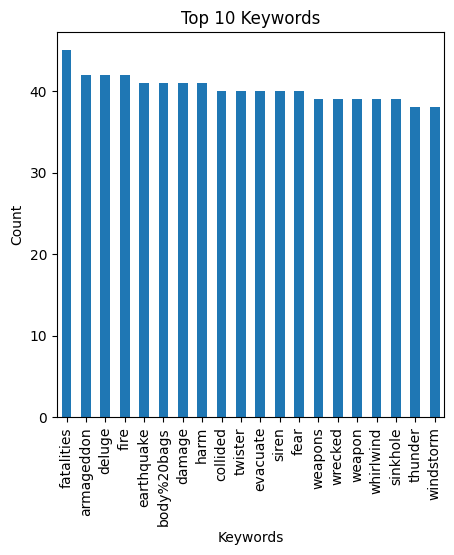

In [35]:
plt.figure(figsize=(5,5))
df['keyword'].value_counts().head(20).plot(kind='bar')
plt.title('Top 10 Keywords')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.show()

In [36]:
disaster_keywords = df[df['target'] == 1]['keyword'].value_counts().head(10)
print(disaster_keywords)

keyword
typhoon                37
outbreak               35
earthquake             32
evacuated              32
derailment             32
debris                 31
wildfire               31
nuclear%20disaster     30
evacuation             30
airplane%20accident    29
Name: count, dtype: int64


In [37]:
non_disaster_keywords = df[df['target'] == 0]['keyword'].value_counts().head(10)
print(non_disaster_keywords)

keyword
body%20bags    40
armageddon     37
harm           37
ruin           36
deluge         36
wrecked        36
twister        35
fear           35
siren          35
screaming      34
Name: count, dtype: int64


In [38]:
#number of words in each tweet
#df['Number_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [39]:
#number of sentences in each tweet
#df['Number_of_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [40]:
df.head()

,keyword,text,target
0,earthquake,deed reason earthquake may allah forgive we,1
1,fire,forest fire near la ronge sask canada,1
2,evacuation,resident ask place notify officer evacuation s...,1
3,wildfire evacuation,people receive wildfire evacuation order calif...,1
4,wildfire,get send photo ruby alaska smoke wildfire pour...,1


In [41]:
# plt.figure(figsize=(5,4))
# sns.histplot(df['Number_of_words'], kde=True)
# plt.title('Distribution of Text Length')
# plt.show()

In [42]:
#EDA
#1.checking percentage of each both target values
df['target'].value_counts()

target
0    4228
1    3080
Name: count, dtype: int64

In [43]:
df.head()

,keyword,text,target
0,earthquake,deed reason earthquake may allah forgive we,1
1,fire,forest fire near la ronge sask canada,1
2,evacuation,resident ask place notify officer evacuation s...,1
3,wildfire evacuation,people receive wildfire evacuation order calif...,1
4,wildfire,get send photo ruby alaska smoke wildfire pour...,1


In [44]:
import numpy as np
from gensim.models import Word2Vec

# Prepare data for Word2Vec (list of tokenized words per document)
tokenized_texts = df['text'].apply(lambda x: x.split())

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, workers=4)

# Check the vocabulary size
print(f"Vocabulary size: {len(w2v_model.wv)}")

Vocabulary size: 5109


In [45]:
def get_document_vector(words, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in words:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    return vector / count if count > 0 else vector

# Create feature matrix
df['w2v_features'] = tokenized_texts.apply(lambda x: get_document_vector(x,w2v_model))

In [46]:
X = np.vstack(df['w2v_features'].values)
y = df['target']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Define the models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter for convergence
}

In [49]:
# Initialize a dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    try:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test and training sets
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        # Evaluate the model on test set
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_report = classification_report(y_test, y_test_pred, output_dict=False)

        # Evaluate the model on training set
        train_accuracy = accuracy_score(y_train, y_train_pred)

        # Store the results
        results[model_name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'test_classification_report': test_report
        }



    except Exception as e:
        print(f"Error occurred while training {model_name}: {e}")

# Display the results
print("\nModel Evaluation Results:")
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Train Accuracy: {result['train_accuracy']}")
    print(f"Test Accuracy: {result['test_accuracy']}")
    print(f"Test Classification Report:\n{result['test_classification_report']}")
    print('-' * 50)

Training RandomForest...
Training XGBoost...


C:\Users\mayur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [16:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training LogisticRegression...

Model Evaluation Results:
Model: RandomForest
Train Accuracy: 0.9781046869654465
Test Accuracy: 0.6491108071135431
Test Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.85      0.74       849
           1       0.64      0.38      0.47       613

    accuracy                           0.65      1462
   macro avg       0.65      0.61      0.61      1462
weighted avg       0.65      0.65      0.63      1462

--------------------------------------------------
Model: XGBoost
Train Accuracy: 0.9775915155661992
Test Accuracy: 0.6580027359781122
Test Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       849
           1       0.61      0.50      0.55       613

    accuracy                           0.66      1462
   macro avg       0.65      0.64      0.64      1462
weighted avg       0.65      0.66      0.65      1462

--------

C:\Users\mayur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mayur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mayur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati